# mmdfila
Detect Filarial Worms.

## Description
This procedure extracts the filarial worms from a complex microscopic image by eliminating progressively the other objects present in the image. The selection of the structures begins in the gray-scale level and, after a threshold, continues based on the object geometrical properties. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia

# Reading
 A microscopic gray-scale image, with two filarial worms, is read.

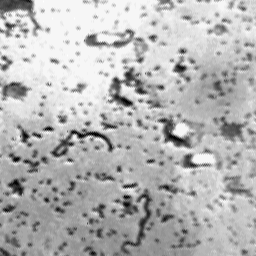

In [2]:
a_pil = Image.open('data/danaus.tif').convert('L')
a_pil

In [3]:
a = np.array (a_pil)

# Background regularization.
The Close by Reconstruction Top-Hat operator is applied to regularize the image background.

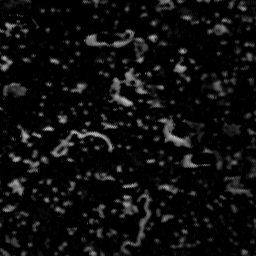

In [4]:
b = ia.iacloserecth(a,ia.iasebox(5));
Image.fromarray(b)

# Removing narrow objects
The gray-scale opening by the elementary cross is applied to remove narrow objects.

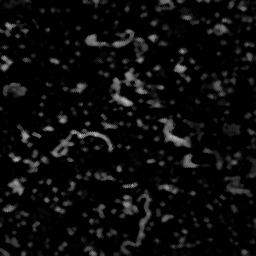

In [5]:
c = ia.iaopen(b)
Image.fromarray(c)

# Removing small objects
The gray-scale area open operator is applied to remove small objects.

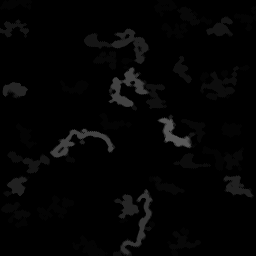

In [6]:
d = ia.iaareaopen(c,200)
Image.fromarray(d)

## Thresholding

The threshold operator is applied to extract a reduced set of structures that include the two worms present in the image. 

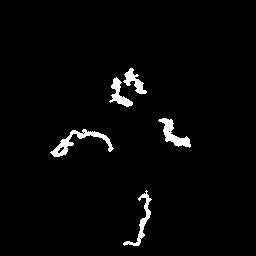

In [7]:
e = ia.iathreshad(d,50)
Image.fromarray(e.astype(np.uint8)*255)

## Skeleton

The objective of the sequence of transformations, that begin with the homotopic skeleton, is to eliminateg the structures that are not worms. The information used for the filtering is that the worms are longer than any other structure found. 

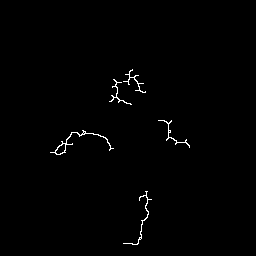

In [8]:
f = ia.iathin(e)
Image.fromarray(f.astype(np.uint8)*255)

## Elimination of short structures

The first 12 points of the skeleton branches, counting from their extremities, are eliminated. The structures that were not eliminated will be the markers for extracting the two worms. 

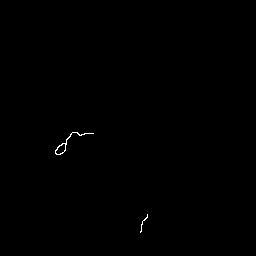

In [9]:
g = ia.iathin(f,ia.iaendpoints(), 12);
Image.fromarray(g.astype(np.uint8)*255)

## Reconstruction of the worms from their markers
The binary reconstruction operator is applied to reconstruct the binary image produced by the threshold from the marker image.

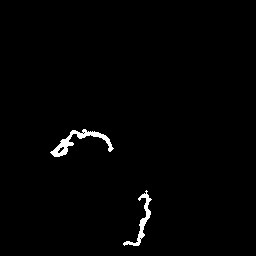

In [10]:
h = ia.iainfrec(g,e)
Image.fromarray(h.astype(np.uint8)*255)

## Final display

The structures extracted are overlaid to the input gray-scale image. 

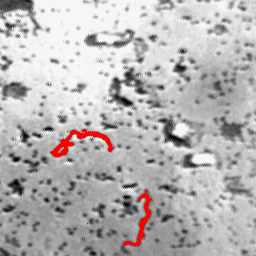

In [11]:
Image.fromarray(ia.iagshow(a, h).transpose(1, 2, 0))